# Análisis de `PR_Earthquake_Tweets_Jan2020.csv`

Este cuaderno presenta un análisis estructurado de los datos de Twitter relacionados con los terremotos de Puerto Rico de enero de 2020. Incluye:

- **Carga y preprocesamiento de datos**.
- **Análisis de datos e ingeniería de características**.
- **Análisis exploratorio de datos (EDA)**
- **Visualizaciones** utilizando bibliotecas como Pandas, Matplotlib, Seaborn, Plotly, PyWaffle y WordCloud.

El objetivo es extraer información significativa del contenido de los tweets y de los patrones de participación, prestando atención al uso del lenguaje, las tendencias temporales y las características textuales. Este cuaderno sirve tanto de informe analítico como de referencia para aplicar diversas herramientas de Python al análisis de las redes sociales.

## 1. Importar bibliotecas

Las siguientes bibliotecas se utilizarán a lo largo del cuaderno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle
from wordcloud import WordCloud

## 2. Carga de datos

Cargar el CSV en un DataFrame de Pandas.

In [3]:
# Cargar CSV con cabecera deducida
df = pd.read_csv('PR_Earthquake_Tweets_Jan2020.csv')

print("Datos cargados. Número de filas:", df.shape[0])
df.head()

Datos cargados. Número de filas: 278


,UTC_Time,Tweet_Content,Post_ID,Tweet_URL,Reply_Count,Repost_Count,Like_Count,View_Count,Bookmark_Count,Tweet_Image_URL,...,media_3_url,binded_media_url,binded_media_domain,binded_media_thumbnail_url,binded_media_title,binded_media_description,is_retweeted,is_quoted,collected_at,input_url
0,2019-12-31 23:17:22+00:00,"#TemblorPR En efecto, volvió a temblar en el s...",1.212151e+18,https://x.com/Motinsitepegas/status/1212150785...,1.0,22.0,13.0,0.0,0.0,https://pbs.twimg.com/media/ENJstqRXYAMzChh.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-31 23:14:47+00:00,#TemblorPR A 4.50 magnitude earthquake has occ...,1.212150e+18,https://x.com/TemblorPR/status/121215013370756...,0.0,15.0,15.0,0.0,0.0,https://pbs.twimg.com/media/ENJsHTdWoAMtzjq.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 23:58:39+00:00,4.5 quake hits Puerto Rico amid rare seismic a...,1.212886e+18,https://x.com/TemblorPR/status/121288595014728...,0.0,8.0,11.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03 03:50:02+00:00,A 4.90 magnitude earthquake has occurred near ...,1.212944e+18,https://x.com/TemblorPR/status/121294417951033...,1.0,19.0,17.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-03 03:53:11+00:00,El sismo al sur de Puerto Rico (11:41pm) fue d...,1.212945e+18,https://x.com/AbdielBonillaPR/status/121294497...,1.0,7.0,5.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploración rápida

Inspeccionemos rápidamente los datos.

In [4]:
# Ver las primeras y últimas filas
print(df.head())
print(df.tail())

# Información resumida
df.info()
print(df.describe(include='all'))

# Comprobar si hay valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

                    UTC_Time  \
0  2019-12-31 23:17:22+00:00   
1  2019-12-31 23:14:47+00:00   
2  2020-01-02 23:58:39+00:00   
3  2020-01-03 03:50:02+00:00   
4  2020-01-03 03:53:11+00:00   

                                       Tweet_Content       Post_ID  \
0  #TemblorPR En efecto, volvió a temblar en el s...  1.212151e+18   
1  #TemblorPR A 4.50 magnitude earthquake has occ...  1.212150e+18   
2  4.5 quake hits Puerto Rico amid rare seismic a...  1.212886e+18   
3  A 4.90 magnitude earthquake has occurred near ...  1.212944e+18   
4  El sismo al sur de Puerto Rico (11:41pm) fue d...  1.212945e+18   

                                           Tweet_URL  Reply_Count  \
0  https://x.com/Motinsitepegas/status/1212150785...          1.0   
1  https://x.com/TemblorPR/status/121215013370756...          0.0   
2  https://x.com/TemblorPR/status/121288595014728...          0.0   
3  https://x.com/TemblorPR/status/121294417951033...          1.0   
4  https://x.com/AbdielBonillaPR/status/1

## 4. Limpieza de datos e ingeniería de características

Este paso de preprocesamiento prepara el conjunto de datos para el análisis realizando las siguientes acciones:

- Eliminación de columnas que sólo contienen valores perdidos.
- Eliminación de columnas redundantes o irrelevantes, como ID, URL, metadatos multimedia y métricas de interacción duplicadas.
- Se han rellenado los valores que faltaban en las columnas numéricas y se han convertido en enteros.
- Se ha creado una nueva característica `Total_Engagement` mediante la suma de respuestas, reposiciones, me gusta y favoritos.
- Se han seleccionado sólo las columnas relevantes para el análisis: `Post_ID`, `Tweet_Content`, `Total_Engagement` y `Language`.
- Se ha añadido la función `Tweet_Length`, que representa el número de caracteres de cada tuit.

El conjunto de datos resultante es un subconjunto limpio y centrado, optimizado para el análisis y la visualización.

In [5]:
import pandas as pd

# Paso 1: Eliminar las columnas con valores nulos
df = pd.read_csv("PR_Earthquake_Tweets_Jan2020.csv")
df = df.dropna(axis=1, how='all')

# Paso 2: Eliminar columnas redundantes o duplicadas conocidas
redundant_cols = [
    'id', 'object', 'result_position', 'task_id', 'internal_unique_id',
    'tweet_url', 'original_tweet_url', 'name', 'user_id', 'username',
    'published_at', 'content', 'views_count', 'retweet_count', 'likes',
    'quote_count', 'reply_count', 'bookmarks_count',
    'media_0_thumbnail', 'media_0_type', 'media_0_url',
    'media_1_thumbnail', 'media_1_type', 'media_1_url',
    'media_2_thumbnail', 'media_2_type', 'media_2_url',
    'media_3_thumbnail', 'media_3_type', 'media_3_url',
    'binded_media_url', 'binded_media_domain', 'binded_media_thumbnail_url',
    'binded_media_title', 'binded_media_description',
    'is_retweeted', 'is_quoted', 'collected_at', 'input_url'
]
df = df.drop(columns=[col for col in redundant_cols if col in df.columns])

# Paso 3: Rellenar y convertir las columnas de compromiso
engagement_cols = ["Reply_Count", "Repost_Count", "Like_Count", "Bookmark_Count"]
for col in engagement_cols:
    df[col] = df[col].fillna(0).astype(int)

# Paso 4: Crear columna Total_Engagement
df["Total_Engagement"] = df["Reply_Count"] + df["Repost_Count"] + df["Like_Count"] + df["Bookmark_Count"]

# Paso 5: Renombrar y convertir la hora UTC para el análisis basado en el tiempo
df["Timestamp_UTC"] = pd.to_datetime(df["UTC_Time"])

# Paso 6: Seleccionar las columnas relevantes
df_selected = df[["Post_ID", "Tweet_Content", "Total_Engagement", "Language", "Timestamp_UTC"]].copy()

# Paso 7: Añadir columna Tweet_Length
df_selected["Tweet_Length"] = df_selected["Tweet_Content"].str.len()

# Paso 8: Añadir Tweet_Length_Category basado en bins de longitud
# Definir los intervalos de longitud de los tweets y las etiquetas
length_bins = [0, 80, 140, 200, 280, df_selected["Tweet_Length"].max()]
length_labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Crear una nueva columna categórica.
df_selected["Tweet_Length_Category"] = pd.cut(
    df_selected["Tweet_Length"],
    bins=length_bins,
    labels=length_labels,
    include_lowest=True
)

# Vista previa del DataFrame limpio y transformado
print("DataFrame limpio y transformado:")
df_selected.head()


DataFrame limpio y transformado:


,Post_ID,Tweet_Content,Total_Engagement,Language,Timestamp_UTC,Tweet_Length,Tweet_Length_Category
0,1.212151e+18,"#TemblorPR En efecto, volvió a temblar en el s...",36,es,2019-12-31 23:17:22+00:00,223,Long
1,1.212150e+18,#TemblorPR A 4.50 magnitude earthquake has occ...,30,en,2019-12-31 23:14:47+00:00,145,Medium
2,1.212886e+18,4.5 quake hits Puerto Rico amid rare seismic a...,20,es,2020-01-02 23:58:39+00:00,94,Short
3,1.212944e+18,A 4.90 magnitude earthquake has occurred near ...,37,en,2020-01-03 03:50:02+00:00,122,Short
4,1.212945e+18,El sismo al sur de Puerto Rico (11:41pm) fue d...,13,es,2020-01-03 03:53:11+00:00,104,Short


## 5. Análisis y exploración de datos

### 🟦 SECCIÓN A: Análisis de la distribución

Estos gráficos muestran la forma y la distribución de las dos características numéricas principales:
- **Total_Engagement:** Cuánta atención recibieron los tweets.
- **Longitud_Tweet:** Número de caracteres de cada tweet.
- **Language:** Español o inglés

Utilizamos histogramas para ver la distribución y gráficos de caja para detectar valores atípicos.

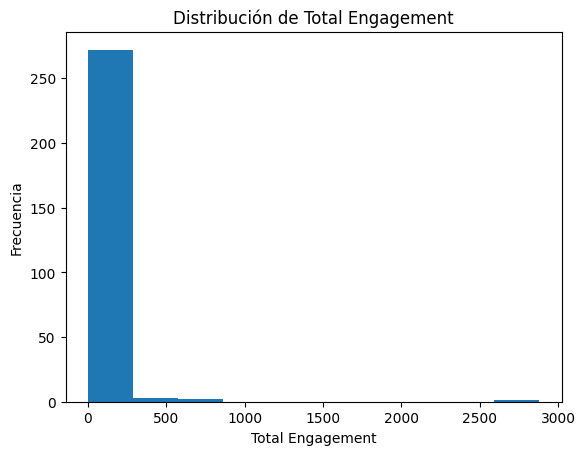

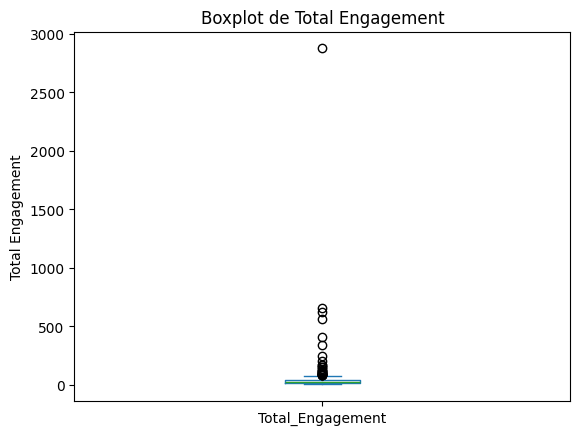

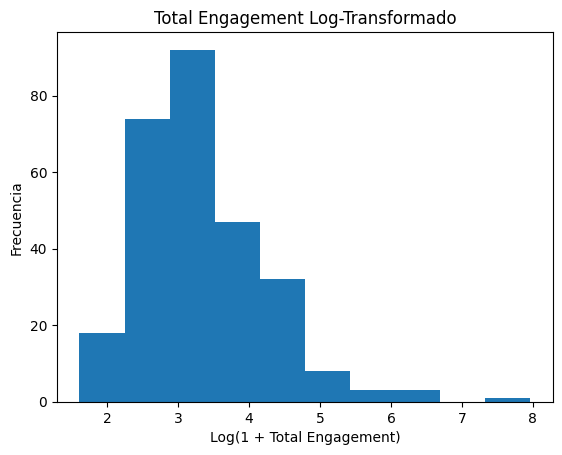

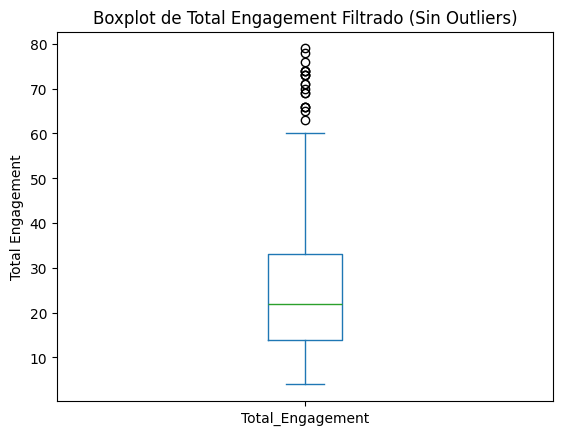

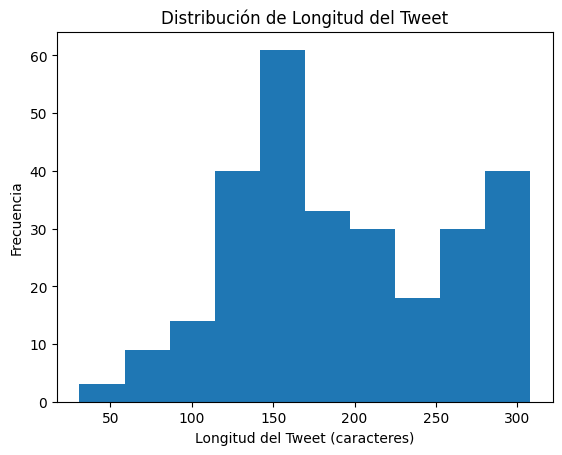

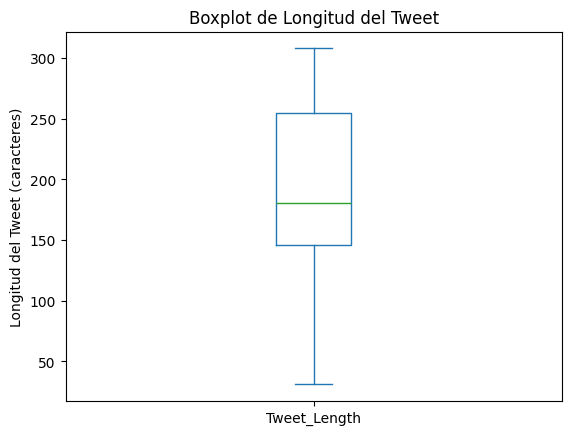

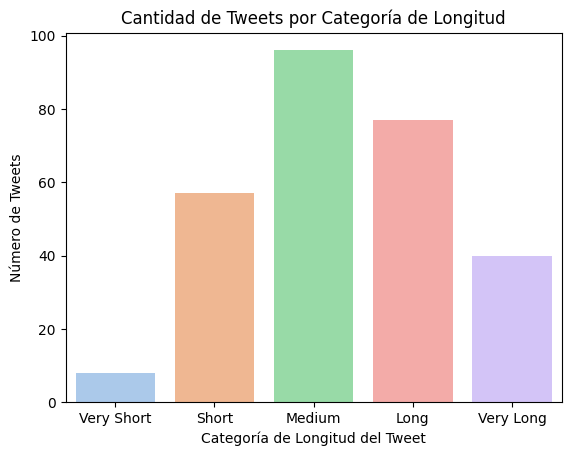

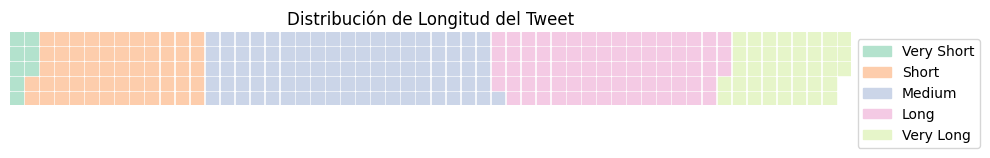

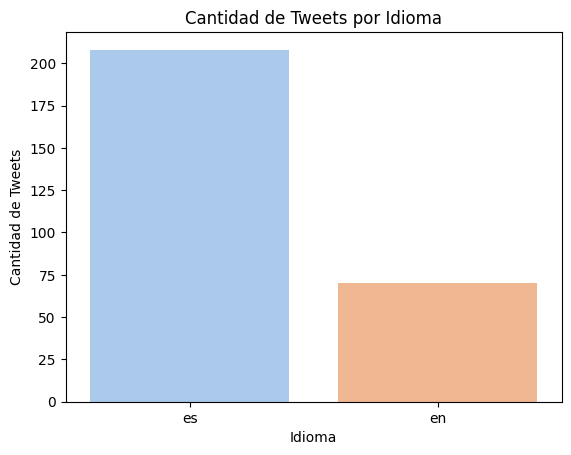

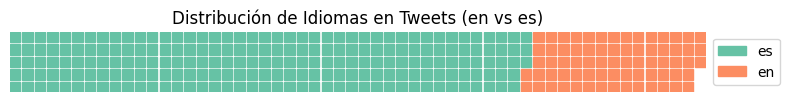

In [6]:
# ======================================================
# SECCIÓN A: DISTRIBUCIÓN DE TOTAL ENGAGEMENT E INSIGHTS
# ======================================================

# Histograma: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="hist", bins=10, title="Distribución de Total Engagement")
plt.xlabel("Total Engagement")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement")
plt.ylabel("Total Engagement")
plt.show()

# Transformación logarítmica de Total Engagement para mejor escala
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected["Log_Total_Engagement"].plot(kind="hist", bins=10, title="Total Engagement Log-Transformado")
plt.xlabel("Log(1 + Total Engagement)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement filtrado por IQR (eliminando outliers extremos)
Q1 = df_selected["Total_Engagement"].quantile(0.25)
Q3 = df_selected["Total_Engagement"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_selected[
    (df_selected["Total_Engagement"] >= Q1 - 1.5 * IQR) &
    (df_selected["Total_Engagement"] <= Q3 + 1.5 * IQR)
]

filtered_df["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement Filtrado (Sin Outliers)")
plt.ylabel("Total Engagement")
plt.show()


# ======================================================
# SECCIÓN B: DISTRIBUCIÓN Y CATEGORIZACIÓN DE LONGITUD DE TWEETS
# ======================================================

# Histograma: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="hist", bins=10, title="Distribución de Longitud del Tweet")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="box", title="Boxplot de Longitud del Tweet")
plt.ylabel("Longitud del Tweet (caracteres)")
plt.show()

# Gráfico de barras: Número de tweets por categoría de longitud
sns.countplot(
    x="Tweet_Length_Category",
    hue="Tweet_Length_Category",  # mismo valor que x para aplicar bien la paleta
    data=df_selected,
    order=["Very Short", "Short", "Medium", "Long", "Very Long"],
    palette="pastel",
    legend=False
)
plt.title("Cantidad de Tweets por Categoría de Longitud")
plt.xlabel("Categoría de Longitud del Tweet")
plt.ylabel("Número de Tweets")
plt.show()

# Gráfico tipo waffle: Distribución por categoría de longitud
length_counts = df_selected["Tweet_Length_Category"].value_counts().sort_index().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=length_counts,
    figsize=(10, 4),
    title={"label": "Distribución de Longitud del Tweet", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9"],
    block_arranging_style='snake',
)
plt.show()


# ======================================================
# SECCIÓN C: DISTRIBUCIÓN DE IDIOMAS
# ======================================================

# Gráfico de barras: Tweets por idioma
if "Language" in df_selected.columns:
    sns.countplot(
        x="Language",
        hue="Language",
        data=df_selected,
        palette="pastel",
        legend=False
    )
    plt.title("Cantidad de Tweets por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Cantidad de Tweets")
    plt.show()

# Gráfico tipo waffle: Distribución de idiomas
language_counts = df_selected["Language"].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=language_counts,
    figsize=(8, 4),
    title={"label": "Distribución de Idiomas en Tweets (en vs es)", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#66c2a5", "#fc8d62"],
    block_arranging_style='snake',
)
plt.show()


### 📊 **Compromiso total**

#### 🔹 Histograma
- La distribución bruta de `Total_Engagement` es **altamente sesgada a la derecha**.
- La gran mayoría de los tuits reciben una participación mínima.
- Un pequeño número de tweets son **extremos atípicos** con un engagement muy alto (algunos superan los 2500-2900).

#### 🔹 Boxplot (sin procesar)
- Muestra la **extrema dispersión** en el compromiso.
- La **mediana** es bastante baja, y un puñado de valores atípicos distorsionan significativamente la escala.

#### 🔹 Histograma con transformación logarítmica
- Aplicar una transformación logarítmica (`log(1 + Compromiso_Total)`) ayuda a **normalizar** los datos.
- Los valores transformados siguen una curva **más simétrica, en forma de campana**, haciendo que la distribución sea más fácil de interpretar y comparar.

#### 🔹 Boxplot filtrado (sin valores atípicos)
- Tras aplicar un filtro IQR para eliminar los valores extremos, la distribución revela un patrón de participación más típico.
- La mayoría de los tuits reciben entre **10 y 35 interacciones**, con una **media en torno a 22**.
- Sigue habiendo algunos valores atípicos moderados, pero la escala general es ahora más interpretable.

#### ✅ Análisis:
> `Total_Engagement` está muy sesgado, con unos pocos tuits virales que distorsionan los resúmenes visuales y estadísticos. Tanto la **transformación logarítmica** como el **filtrado basado en IQR** son formas eficaces de obtener una visión más clara del grueso de la distribución.

---

### 📝 **Longitud del tuit**

#### 🔹 Histograma
- La distribución es **pareja** con algunos picos, posiblemente **ligeramente bimodal**.
- Una gran concentración de tuits se sitúa entre **120-300 caracteres**.
- Los picos en torno a **150** y **280** probablemente reflejan el comportamiento común de los tuits y el límite de caracteres de Twitter.

#### 🔹 Boxplot
- La longitud de los tuits oscila entre **30 y más de 300 caracteres**.
- La mediana se aproxima a los 180 caracteres.
- La distribución es **bastante simétrica** sin valores atípicos extremos.

#### 🔹 Categorías de longitud de los tweets (Bar & Waffle)
- La mayoría de los tuits entran en las categorías **Medio** y **Largo**.
- Los **Tweets muy largos** son bastante comunes, lo que probablemente refleja que los usuarios maximizan el límite de caracteres.
- Los **tweets muy cortos** son poco frecuentes, lo que sugiere que los tweets con poco contexto son poco comunes durante acontecimientos como catástrofes naturales.
- Tanto el **diagrama de barras** como el **diagrama waffle** ofrecen una visión clara y coherente de cómo se distribuyen las longitudes de los tuits entre las distintas categorías.

#### ✅ Análisis:
> La longitud de los tuits es coherente y está bien distribuida. La adición de **categorías de longitud** ayuda a segmentar a los usuarios por estilo de comunicación. La mayoría de los usuarios publican tuits de longitud media a larga, lo que puede reflejar la urgencia o el detalle de las conversaciones impulsadas por eventos.
---

### 🌐 **Patrones de tuits basados en el lenguaje**

#### 🔹 Gráfico de recuento
- La **mayoría de los tweets** están en español (`es`), lo que supone aproximadamente el **75%** del conjunto de datos.
- Los tweets en inglés (`es`) son **significativamente menos**, lo que sugiere que los hispanohablantes publicaron más activamente durante este evento.
- Este desequilibrio podría reflejar el **idioma dominante** de la región o el público afectado.

#### 🔹 Gráfico de gofres
- Ofrece una confirmación **visualmente intuitiva** del gráfico de recuento.
- Cada bloque representa aproximadamente un tweet; la diferencia visual entre `es` y `en` es clara y refuerza las mismas proporciones.
- Ayuda a **comunicar rápidamente la distribución** a públicos no técnicos.

#### ✅ Análisis:
> El conjunto de datos está **desviado hacia el español**, lo que puede influir en el **análisis de texto**, las **métricas de compromiso** y el **modelo**. Considera **estratificar o equilibrar** por idioma cuando compares comportamientos de tweets o entrenes clasificadores.

---

### Interpretación general

- El **`Compromiso_total`** requiere transformación o filtrado debido a la **excesiva asimetría y a los valores atípicos extremos**. Las versiones **transformadas logarítmicamente** o **filtradas** deben utilizarse para modelos estadísticos o comparaciones de grupos.
- La longitud de los tweets es una variable fiable que se comporta bien y puede utilizarse directamente en los análisis sin modificaciones.
- **Idioma** desequilibrado, con predominio de tweets en español, lo que puede sesgar los análisis comparativos o predictivos.

### 🟦 SECCIÓN B: Tendencias temporales

Estos gráficos muestran cómo evolucionan el `Total_Engagement` y la `Tweet_Length` a lo largo del tiempo utilizando la fecha y hora reales de publicación (`Timestamp_UTC`).

- El gráfico de líneas del compromiso a lo largo del tiempo ayuda a identificar los picos de atención e interacción del público.
- El gráfico de líneas de la longitud de los tweets a lo largo del tiempo muestra los cambios en la composición de los tweets, por ejemplo si los usuarios se vuelven más expresivos o concisos.

Esta visión temporal proporciona información sobre el comportamiento de los usuarios y las pautas de participación a medida que se desarrollan los acontecimientos.

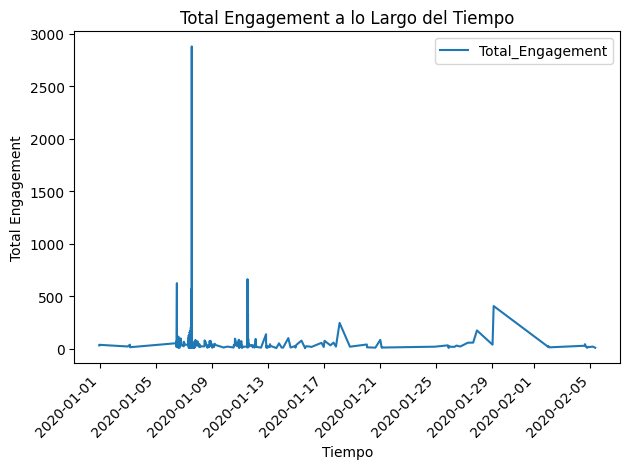

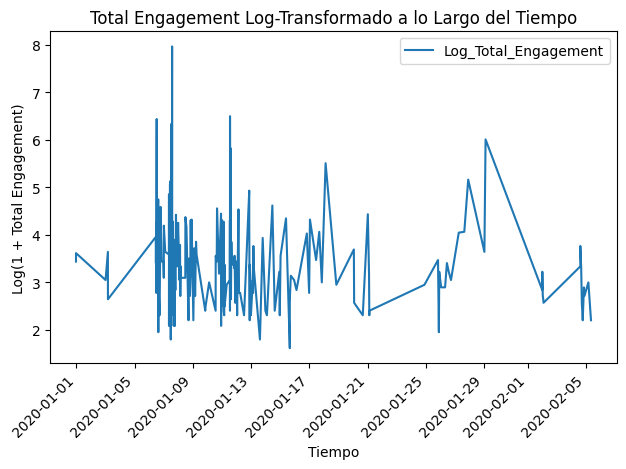

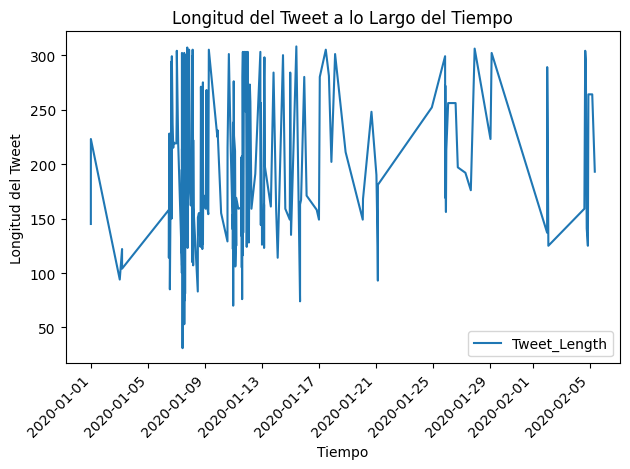

In [8]:
# -------------------------------------------
# SECCIÓN B: TENDENCIAS TEMPORALES
# -------------------------------------------

# Gráfico de línea: Total Engagement a lo largo del tiempo (valores brutos)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Total_Engagement", kind="line",
    title="Total Engagement a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de línea: Total Engagement log-transformado a lo largo del tiempo
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Log_Total_Engagement", kind="line",
    title="Total Engagement Log-Transformado a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Log(1 + Total Engagement)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de línea: Longitud del Tweet a lo largo del tiempo
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Tweet_Length", kind="line",
    title="Longitud del Tweet a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Longitud del Tweet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📈 **Análisis de Tendencias Temporales**

---

### 🔹 Total Engagement a lo Largo del Tiempo (Bruto)

- Este gráfico muestra un **pico pronunciado alrededor del 9 de enero**, alcanzando casi **3,000 interacciones**. Probablemente esté relacionado con un evento importante (por ejemplo, un gran terremoto o una noticia de último momento).
- El engagement durante el resto del período es **relativamente plano**, con solo picos menores y actividad esporádica.
- La interpretación es difícil debido a que los **valores extremos dominan la escala**, comprimiendo los días con menor actividad.

#### ✅ Análisis:
> Aunque útil para identificar picos importantes, la línea de engagement bruto está muy sesgada y oculta fluctuaciones menores. Utiliza la versión transformada logarítmicamente para una mejor resolución.

---

### 🔹 Total Engagement a lo Largo del Tiempo (Transformación Logarítmica)

- Tras aplicar `log(1 + Total_Engagement)`, la **tendencia de engagement se vuelve más clara e interpretable** a lo largo de toda la línea de tiempo.
- Ahora se pueden observar **variaciones diarias** en el engagement, incluyendo actividad moderada fuera del pico principal.
- Se nota un aumento visible a finales de enero, que antes estaba comprimido en la escala bruta.

#### ✅ Análisis:
> La escala logarítmica ayuda a **revelar patrones significativos** en todos los niveles de engagement, no solo en los valores atípicos. Esta versión es mejor para comparar el comportamiento a lo largo del tiempo.

---

### 🔹 Longitud de Tweets a lo Largo del Tiempo

- Los tweets parecen ser consistentemente largos durante todo el período, muchos **cerca del límite de 280 caracteres**.
- No se observa una tendencia temporal fuerte, pero sí hay cierta **variabilidad**, especialmente de mediados a finales de enero, donde la longitud fluctúa más.
- Los picos pueden corresponder a tweets más detallados o emocionalmente expresivos durante momentos clave.

#### ✅ Análisis:
> La longitud de los tweets no muestra una tendencia temporal clara, pero podrían existir **cambios impulsados por el contexto** que valga la pena explorar (por ejemplo, por evento, sentimiento o idioma).

---

### 🧠 Resumen

| Gráfico                           | Punto Fuerte Principal           | Cuándo Usarlo                            |
|----------------------------------|----------------------------------|------------------------------------------|
| **Engagement Bruto**             | Destaca eventos extremos         | Útil para identificar picos importantes  |
| **Engagement Transformado (Log)**| Aclara tendencias en la línea de tiempo | Ideal para observar patrones generales   |
| **Longitud de Tweets en el Tiempo** | Refleja comportamiento expresivo | Puede apoyar análisis centrados en contenido |


### 🟦 SECCIÓN C: Comparaciones Basadas en el Idioma

Comparamos el comportamiento de los tweets según el idioma:

- **Gráfico de Conteo**: Muestra cuántos tweets se publicaron en cada idioma.
- **Gráfico de Barras**: Compara los niveles promedio de engagement por idioma.
- **Gráfico de Dispersión (Strip Plot)**: Revela la distribución y variabilidad del engagement en cada idioma.

En conjunto, estos gráficos permiten identificar qué comunidades lingüísticas fueron más activas y generaron mayor interacción.

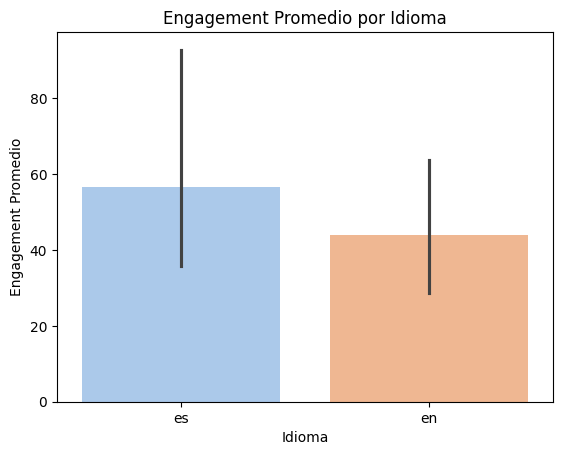

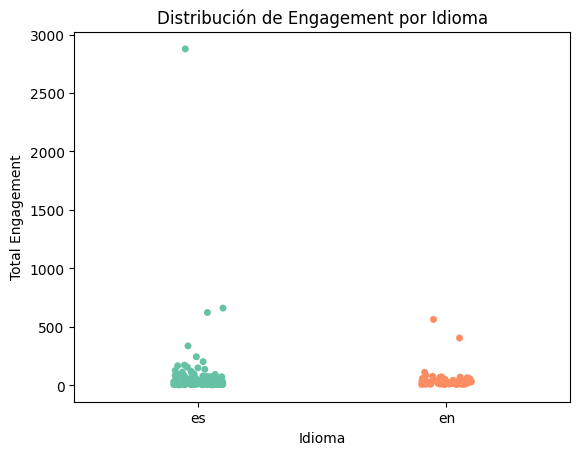

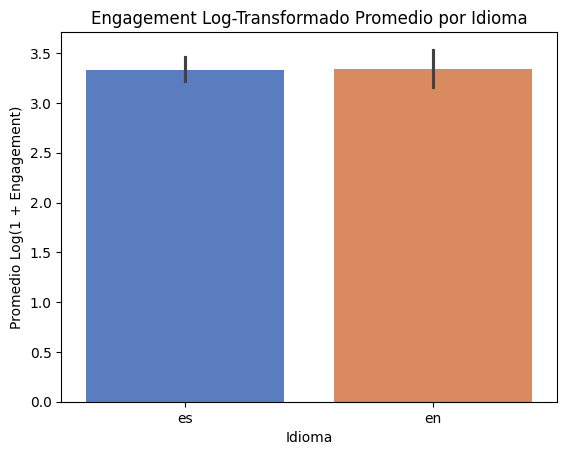

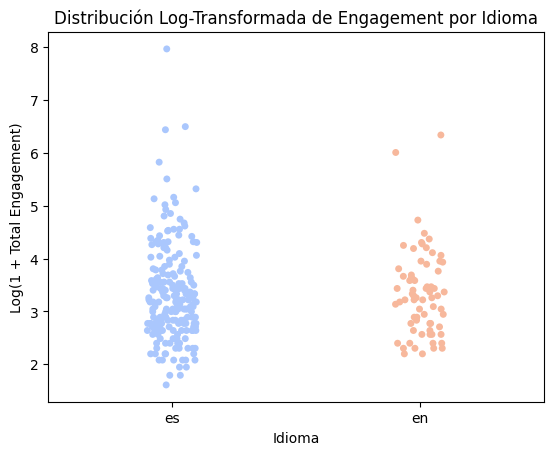

In [9]:
# -------------------------------------------
# SECCIÓN C: COMPARACIONES BASADAS EN IDIOMA
# -------------------------------------------

# Gráfico de barras (Seaborn): Promedio de Total Engagement por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="pastel", legend=False)
    plt.title("Engagement Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Engagement Promedio")
    plt.show()

# Gráfico tipo strip: Distribución bruta de engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="Set2", jitter=True, legend=False)
    plt.title("Distribución de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Total Engagement")
    plt.show()

# -------------------------------------------
# NUEVO: Engagement Log-Transformado por Idioma
# -------------------------------------------

# Asegurarse de que la columna log-transformada existe
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])

# Gráfico de barras: Promedio de engagement log-transformado por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="muted", legend=False)
    plt.title("Engagement Log-Transformado Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Promedio Log(1 + Engagement)")
    plt.show()

# Gráfico tipo strip: Distribución log-transformada del engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="coolwarm", jitter=True, legend=False)
    plt.title("Distribución Log-Transformada de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Log(1 + Total Engagement)")
    plt.show()


### 🌐 **Comparaciones Basadas en el Idioma**

---

### 🔹 Cantidad de Tweets por Idioma (Barras + Waffle)

- **Gráfico de Barras**: Se publicaron significativamente más tweets en **español (`es`)** que en inglés (`en`), en una proporción aproximada de **3:1**.
- **Gráfico tipo Waffle**: Refuerza claramente esta desproporción utilizando una cuadrícula visualmente intuitiva.

#### ✅ Análisis:
> El español domina el conjunto de datos, lo que sugiere un enfoque hacia una audiencia local o una mayor participación de usuarios hispanohablantes.

---

### 🔹 Engagement Promedio por Idioma (Bruto)

- Los tweets en español (`es`) tienen un **promedio de engagement total más alto** que los tweets en inglés.
- Sin embargo, las **barras de error** son grandes, lo que indica una **alta variabilidad**, probablemente debido a algunos tweets virales en español que distorsionan el promedio.

#### ✅ Análisis:
> Los tweets en español parecen generar más engagement en promedio, pero los resultados pueden estar influenciados por **valores atípicos**. Es recomendable usar la transformación logarítmica para confirmar.

---

### 🔹 Distribución de Engagement por Idioma (Strip Plot - Bruto)

- Los tweets en español tienen **varios outliers con alto engagement** (superando los 500 e incluso cerca de 3,000).
- Los tweets en inglés están más agrupados por debajo de los 200, con menos casos extremos.
- La escala visual está distorsionada por estos outliers, lo que dificulta comparar el comportamiento típico de los tweets.

#### ✅ Análisis:
> Los totales brutos destacan los casos extremos, pero **ocultan los patrones generales**. La mayoría de los tweets en ambos idiomas reciben engagement bajo o moderado.

---

### 🔹 Engagement Promedio por Idioma (Transformación Logarítmica)

- Tras la transformación logarítmica, la **diferencia en engagement promedio entre `es` y `en` prácticamente desaparece**.
- Ambos idiomas muestran un promedio muy similar de engagement logarítmico (~3.3), con una varianza mínima.

#### ✅ Análisis:
> Una vez ajustados los outliers, **ambos idiomas muestran comportamientos de engagement casi idénticos**. La diferencia anterior era impulsada principalmente por casos extremos.

---

### 🔹 Distribución de Engagement Logarítmico por Idioma

- La distribución transformada es **más compacta, suave y simétrica** para ambos idiomas.
- El español sigue mostrando una dispersión ligeramente mayor, pero la mayoría de los tweets se encuentran en el rango de **log(1 + engagement) = 2.5 a 5**.
- **Un tweet extremo en `es`** alcanza 8, y algunos tweets en `en` superan 6.

#### ✅ Análisis:
> Este gráfico revela un **comportamiento de engagement comparable** entre idiomas, aunque el español presenta un rango ligeramente más amplio.

---

### 🧠 Conclusiones Finales:

| Métrica                                | Resultados Brutos                 | Vista Transformada (Log)            |
|----------------------------------------|-----------------------------------|-------------------------------------|
| **Cantidad de Tweets**                 | Domina el español (`es`)          | —                                   |
| **Engagement Promedio**                | Mayor en `es`, pero variable      | Casi idéntico (`es` ≈ `en`)         |
| **Distribución del Engagement**        | Sesgada; `es` con outliers altos  | Ambos idiomas se ven equilibrados   |
| **Conclusión Práctica**                | Los tweets en español tienen picos más altos | Los tweets en inglés son más consistentes |


### 🟦 SECCIÓN D: Relación entre características

Usamos un **scatter plot** y **gráfico de barras** para probar si hay relación entre:

- **Tweet_Length** (eje x)
- **Compromiso_total** (eje y)

Ayuda a responder: *¿Los tweets más largos tienden a recibir más atención?*

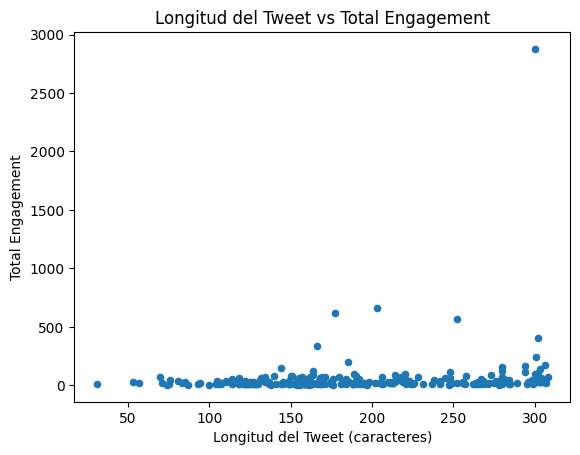

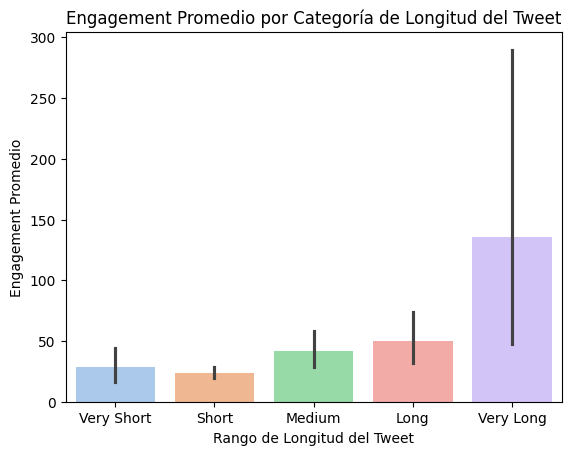

In [10]:
# -------------------------------------------
# SECCIÓN D: RELACIÓN ENTRE CARACTERÍSTICAS
# -------------------------------------------

# Gráfico de dispersión: Longitud del Tweet vs. Total Engagement
df_selected.plot(kind="scatter", x="Tweet_Length", y="Total_Engagement", title="Longitud del Tweet vs Total Engagement")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Total Engagement")
plt.show()

# Gráfico de barras: Promedio de Engagement por Categoría de Longitud del Tweet
sns.barplot(x="Tweet_Length_Category", y="Total_Engagement", hue="Tweet_Length_Category", data=df_selected, palette="pastel", legend=False)
plt.title("Engagement Promedio por Categoría de Longitud del Tweet")
plt.xlabel("Rango de Longitud del Tweet")
plt.ylabel("Engagement Promedio")
plt.show()

### 🔗 **Relación entre la longitud del Tweet y la participación**

#### 🔹 Gráfico de dispersión: longitud del Tweet frente al compromiso total
- La mayoría de los puntos están **agrupados en el extremo inferior del eje de compromiso**, lo que confirma que **los tuits cortos-medios suelen recibir poco compromiso**.
- Aparece una **tendencia positiva clara** para los **tweets más largos**, con varios valores atípicos por encima de **500+ interacciones**, especialmente cerca de la marca de **280-300 caracteres**.
- Un valor atípico extremo** (~2900 interacciones) corresponde a un **tweet muy largo**, lo que refuerza el patrón.

#### 🔹 Gráfico de barras: participación media por categoría de longitud
- La participación media aumenta de forma constante** con la longitud del tuit.
- Los **tweets muy largos (280 caracteres o más)** tienen el **compromiso medio más alto** con diferencia, lo que sugiere que los usuarios tienden a comprometerse más con los tweets ricos en contenido.
- La varianza (barras de error) también **se amplía con la longitud**, lo que indica **menos previsibilidad**, pero también **mayor compromiso** en los tuits más largos.

#### ✅ Análisis:
> Existe una **clara correlación positiva** entre la longitud del tuit y el engagement. Aunque no todos los tweets largos se convierten en virales, la **probabilidad de un alto compromiso** aumenta con la longitud del tweet. Esta idea apoya el uso de **tweets más largos** para impulsar la interacción pública, especialmente durante eventos de gran impacto.

### 🟦 SECCIÓN E: Matriz de correlación

Este mapa de calor muestra el **coeficiente de correlación** entre:

- `Total_Engagement`
- `Tweet_Length`

Los valores de correlación oscilan entre:
- **+1** = fuertemente positivo
- **0** = sin correlación
- **-1** = fuertemente negativo

Esto confirma o cuestiona lo que vimos en el gráfico de dispersión.

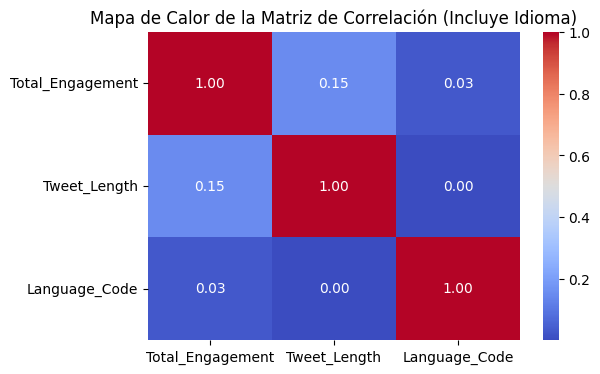

In [11]:
# -------------------------------------------
# SECCIÓN E: MATRIZ DE CORRELACIÓN
# -------------------------------------------

# Mapa de calor: Correlación entre variables numéricas

# Convertir idioma a códigos numéricos para incluir en la correlación
df_selected["Language_Code"] = df_selected["Language"].map({"en": 0, "es": 1})

# Matriz de correlación incluyendo el código del idioma
corr_matrix = df_selected[["Total_Engagement", "Tweet_Length", "Language_Code"]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlación (Incluye Idioma)")
plt.show()


### 🧮 **Matriz de correlaciones (incluida la lengua)**

#### 🔹 Observaciones:
- **`Tweet_Length` y `Total_Engagement`** muestran una **débil correlación positiva** (≈ 0,15), lo que sugiere que los tuits más largos tienden a recibir algo más de engagement - coherente con anteriores percepciones visuales.
- El código de idioma (0 = inglés, 1 = español) tiene una correlación cercana a cero tanto con la longitud del tweet como con el compromiso total:
  - **0,03** con el compromiso
  - **0,00** con la longitud del tweet
- Estos valores tan bajos indican que, en este conjunto de datos, el idioma por sí solo no es un factor determinante** de la longitud de los tweets ni de la participación.

#### ✅ Análisis:
> El mapa de correlación confirma que **la longitud del tweet tiene una relación leve con el compromiso**, mientras que **el idioma no muestra una correlación significativa**. Esto sugiere que los patrones de compromiso son **en gran medida independientes del idioma** y están más influenciados por otros factores como la riqueza del contenido o el contexto.

### 🟦 SECCIÓN F: Visualizaciones Interactivas con Plotly

Esta sección recrea visualizaciones clave utilizando **Plotly** para ofrecer mayor interactividad y profundidad de análisis. Estos gráficos permiten:

- 🔍 **Hacer zoom y desplazarse** para inspeccionar picos de engagement a lo largo del tiempo  
- 🖱️ **Ver tooltips al pasar el cursor** para explorar datos con precisión  
- 📊 **Comparaciones lado a lado** entre el engagement bruto y el transformado (log)  
- 💡 Útil para presentaciones, paneles interactivos y análisis detallado del comportamiento de engagement

In [12]:
# -------------------------------------------
# SECCIÓN F: VISUALIZACIONES INTERACTIVAS CON PLOTLY
# -------------------------------------------

import plotly.express as px
import plotly.graph_objects as go

# Gráfico de línea interactivo: Total Engagement a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Total_Engagement",
    title="🕒 Total Engagement a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Total_Engagement": "Total Engagement"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Total Engagement")
fig.show()

# Gráfico de línea interactivo: Total Engagement log-transformado a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Log_Total_Engagement",
    title="🕒 Total Engagement Log-Transformado a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Log_Total_Engagement": "Log(1 + Engagement)"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Log(1 + Total Engagement)")
fig.show()

# Histograma interactivo: Distribución de Total Engagement
fig = px.histogram(
    df_selected,
    x="Total_Engagement",
    nbins=30,
    title="📊 Distribución de Total Engagement (Interactivo)",
    labels={"Total_Engagement": "Total Engagement"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

# Histograma interactivo: Distribución de Total Engagement log-transformado
fig = px.histogram(
    df_selected,
    x="Log_Total_Engagement",
    nbins=30,
    title="📊 Distribución Log-Transformada de Total Engagement (Interactivo)",
    labels={"Log_Total_Engagement": "Log(1 + Engagement)"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

## ☁️ Nube de Palabras: Términos Frecuentes en Tweets

Esta Nube de Palabras muestra las **palabras más comunes** en todos los tweets.

- Las **palabras más grandes** = mayor frecuencia de uso.  
- Útil para identificar **temas en tendencia** o términos clave.  
- Se eliminaron las **stopwords** comunes (en inglés y español) y el ruido típico de Twitter (como `RT`, `https`) para mayor claridad.

> Un resumen visual rápido del contenido de los tweets en ambos idiomas.

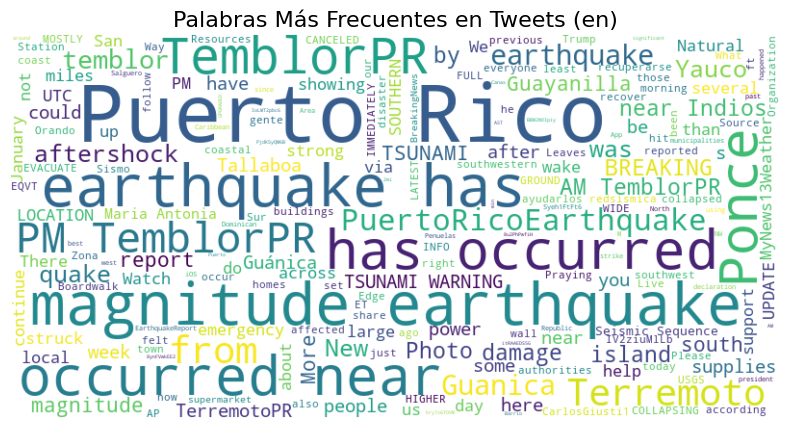

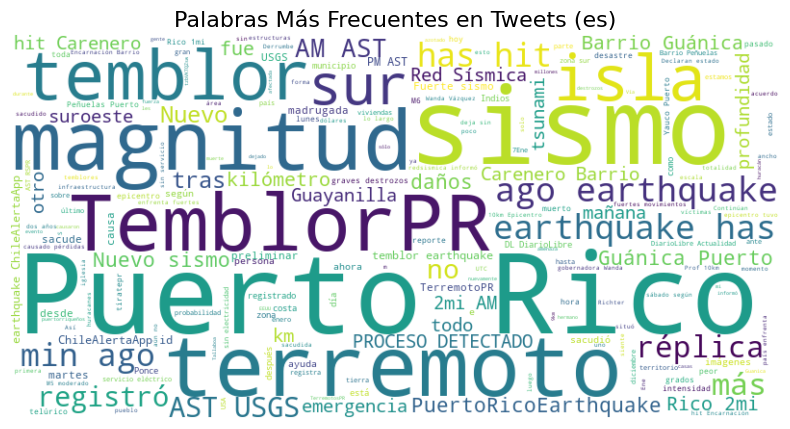

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir conjunto reutilizable de stopwords (palabras vacías)
custom_stopwords = {
    "https", "RT", "co", "amp",
    "de", "a", "t", "el", "que", "se", "la", "en", "por",
    "los", "las", "del", "al", "un", "una", "con", "para",
    "este", "esta", "estos", "estas", "ese", "esa", "esos", "esas",
    "y", "o", "u", "pero", "su", "sus", "porque", "son",
    "ser", "sido", "ha", "han", "hay", "qué", "etc", "PuertoRico",
    "the", "is", "to", "of", "and", "in", "for", "on", "at", "with", "as", "this", "that", "it", "are",
}

# Función para generar y mostrar una nube de palabras según el idioma
def generate_wordcloud_for_language(language_code):
    text = " ".join(
        df_selected[df_selected["Language"] == language_code]["Tweet_Content"].dropna().astype(str)
    )
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
        stopwords=custom_stopwords
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Palabras Más Frecuentes en Tweets ({language_code})", fontsize=16)
    plt.show()

# Generar nubes de palabras para inglés y español
generate_wordcloud_for_language("en")
generate_wordcloud_for_language("es")


### 🌐 **Nubes de palabras en idiomas específicos**

#### 🟩 **Tweets en inglés (en)**

- Términos dominantes:
  **"Puerto Rico", "terremoto", "magnitud", "ocurrió", "ha", "Ponce", "TemblorPR "**.
  Reflejan **información objetiva y actualizaciones** sobre el suceso, con un uso intensivo de términos como *"magnitud "*, *"ha ocurrido "* y *"terremoto "*, lo que sugiere tuits centrados en la información.

- Señales de emergencia:
  Frases como **"ADVERTENCIA TSUNAMI", "EVACUAR", "Vigilar", "daños "** están presentes pero en menor medida, probablemente sólo en algunos tweets, no dominantes en todos.

- Referencias de ubicación:
  Incluye **Guánica, Yauco, Ponce**, señalando **zonas afectadas** en el sur de Puerto Rico.

- Observación:
  El vocabulario es formal e informativo, probablemente reflejando **cobertura de noticias, alertas o cuentas oficiales**.

---

#### 🟧 **Tweets en español (es)**

- Términos dominantes:
  **"Puerto Rico", "sismo", "terremoto", "temblor", "magnitud", "registró", "réplica "**.
  Estos términos refuerzan el enfoque de la **terminología relacionada con los terremotos**, con **"sismo "** y **"terremoto "** en primer plano, con el significado de *terremoto*.

- Contexto temporal y regional:
  Términos como **"min", "ago", "AST", "sur", "km", "profundidad "** sugieren **referencias temporales y geográficas más descriptivas**.

- Vocabulario emocional y comunitario:
  Palabras como **"emergencia", "daños", "imágenes", "zona", "otro", "isla "** apuntan a un **impacto personal o regional**, posiblemente una narración más emocional o actualizaciones locales.

- Observación:
  En comparación con los tuits en inglés, los contenidos en español suelen **describir experiencias vividas** o consecuencias, posiblemente de personas sobre el terreno.

---

### ✅ **Análisis**

> **Los tuits en inglés** se centran en **información sobre hechos**, a menudo de fuentes de noticias o alertas, mientras que **los tuits en español** muestran un lenguaje más **localizado y descriptivo** que incluye **emoción, ubicación y referencias temporales**. Esto apoya la idea de que los diferentes grupos lingüísticos en Twitter pueden reflejar **diferentes roles y perspectivas** durante la comunicación de desastres.

## Conclusión

Este análisis ha proporcionado una visión global del conjunto de datos `PR_Earthquake_Tweets_Jan2020.csv`, centrándose en la participación en los tweets, las características del contenido y los patrones lingüísticos. Gracias a la limpieza sistemática de los datos, la ingeniería de características y diversas técnicas de exploración visual, hemos obtenido información sobre:

- La distribución y estructura del contenido de los tweets
- Tendencias temporales de la actividad y la participación en los tweets
- Diferencias de participación entre idiomas
- Temas comunes expresados por los usuarios a través de la frecuencia de palabras

Se emplearon diversas herramientas de visualización -estáticas e interactivas- para mejorar la interpretabilidad y descubrir patrones en los datos. Este enfoque demuestra cómo el ecosistema de ciencia de datos de Python puede aplicarse eficazmente al análisis de las redes sociales, especialmente en el contexto de acontecimientos en tiempo real como las catástrofes naturales.